# Exercice 1

Confusion Matrix:
TP=106, TN=61, FP=2, FN=2

Manual Metric Results:
Accuracy: 0.9766
Precision: 0.9815
Recall (Sensitivity): 0.9815
F1-Score: 0.9815
Specificity: 0.9683
Negative Predictive Value: 0.9683
Matthews Correlation Coefficient (MCC): 0.9497

Sklearn Metric Results:
Accuracy: 0.9766
Precision: 0.9815
Recall: 0.9815
F1-Score: 0.9815
MCC: 0.9497


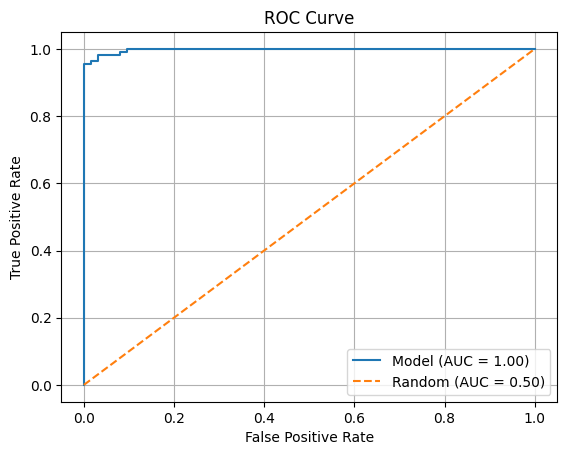


Interpretation:
- AUC close to 1.0 means the model is good at distinguishing between classes.
- Your model AUC: 0.9976, while random guess AUC: 0.5000
- Higher precision means fewer false positives.
- Higher recall means fewer false negatives.
- MCC is a balanced metric, good for imbalanced data.


In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# 1. Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# 4. Predict
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# 5. Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Confusion Matrix:")
print(f"TP={tp}, TN={tn}, FP={fp}, FN={fn}")

# 6. Define your own metric functions
def accuracy(tp, tn, fp, fn):
    return (tp + tn) / (tp + tn + fp + fn)

def precision(tp, fp):
    return tp / (tp + fp)

def recall(tp, fn):
    return tp / (tp + fn)

def f1(p, r):
    return 2 * p * r / (p + r)

def specificity(tn, fp):
    return tn / (tn + fp)

def npv(tn, fn):
    return tn / (tn + fn)

def mcc(tp, tn, fp, fn):
    numerator = (tp * tn) - (fp * fn)
    denominator = np.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn))
    return numerator / denominator

# 7. Calculate manually
acc = accuracy(tp, tn, fp, fn)
prec = precision(tp, fp)
rec = recall(tp, fn)
f1s = f1(prec, rec)
spec = specificity(tn, fp)
npv_val = npv(tn, fn)
mcc_val = mcc(tp, tn, fp, fn)

print("\nManual Metric Results:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall (Sensitivity): {rec:.4f}")
print(f"F1-Score: {f1s:.4f}")
print(f"Specificity: {spec:.4f}")
print(f"Negative Predictive Value: {npv_val:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc_val:.4f}")

# 8. Compare with sklearn
print("\nSklearn Metric Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"MCC: {matthews_corrcoef(y_test, y_pred):.4f}")

# 9. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
random_probs = [0 for _ in range(len(y_test))]

fpr_random, tpr_random, _ = roc_curve(y_test, random_probs)

# AUC Scores
auc_score_model = roc_auc_score(y_test, y_prob)
auc_score_random = roc_auc_score(y_test, random_probs)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f'Model (AUC = {auc_score_model:.2f})')
plt.plot(fpr_random, tpr_random, linestyle='--', label=f'Random (AUC = {auc_score_random:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

# 10. Interpretation
print("\nInterpretation:")
print("- AUC close to 1.0 means the model is good at distinguishing between classes.")
print(f"- Your model AUC: {auc_score_model:.4f}, while random guess AUC: {auc_score_random:.4f}")
print("- Higher precision means fewer false positives.")
print("- Higher recall means fewer false negatives.")
print("- MCC is a balanced metric, good for imbalanced data.")


# Exercise 2

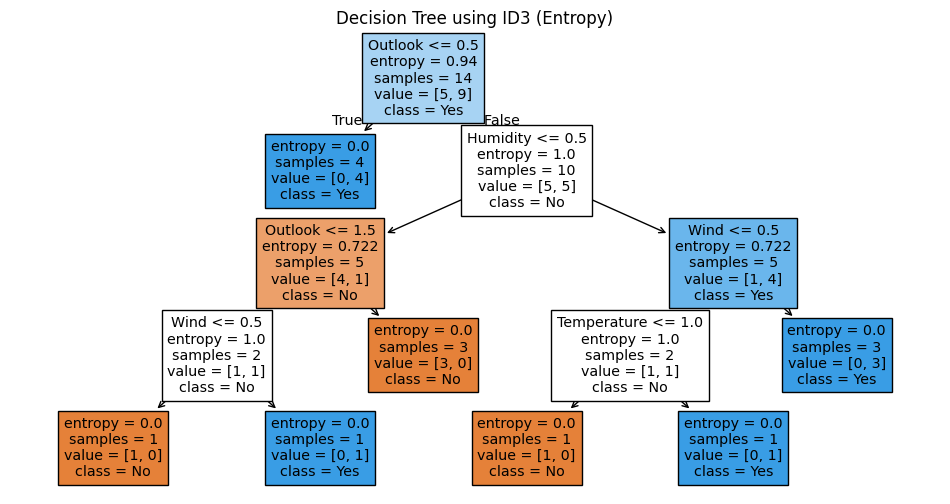

Prediction for new sample (Sunny, Cool, High, Strong): Don't Play

Inference and Interpretation:
- The Decision Tree was trained using the ID3 algorithm (entropy-based).
- The tree structure shows which features (like Outlook, Humidity) affect the decision.
- A sample with Sunny, Cool, High humidity, and Strong wind was classified as: Don't Play Tennis
- This means the tree learned the pattern from historical data effectively.


C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [16]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 1. Play Tennis Dataset
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast',
                'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
                    'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
                 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong',
             'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
                   'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)

# 2. Encode categorical data using Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

# Features and Target
X = df.drop('PlayTennis', axis=1)
y = df['PlayTennis']

# 3. Train Decision Tree (ID3 = Entropy)
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X, y)

# 4. Visualize the Tree
plt.figure(figsize=(12, 6))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree using ID3 (Entropy)")
plt.show()

# 5. Classify a new sample
# Sample: Outlook=Sunny, Temperature=Cool, Humidity=High, Wind=Strong
# Manually encode: Outlook=2, Temperature=1, Humidity=0, Wind=1 (based on fit)
sample = [[2, 1, 0, 1]]
prediction = model.predict(sample)
print("Prediction for new sample (Sunny, Cool, High, Strong):", "Play" if prediction[0]==1 else "Don't Play")

# 6. Interpret the model's rules
print("\nInference and Interpretation:")
print("- The Decision Tree was trained using the ID3 algorithm (entropy-based).")
print("- The tree structure shows which features (like Outlook, Humidity) affect the decision.")
print("- A sample with Sunny, Cool, High humidity, and Strong wind was classified as:",
      "Play Tennis" if prediction[0] == 1 else "Don't Play Tennis")
print("- This means the tree learned the pattern from historical data effectively.")

# Exercise 3 

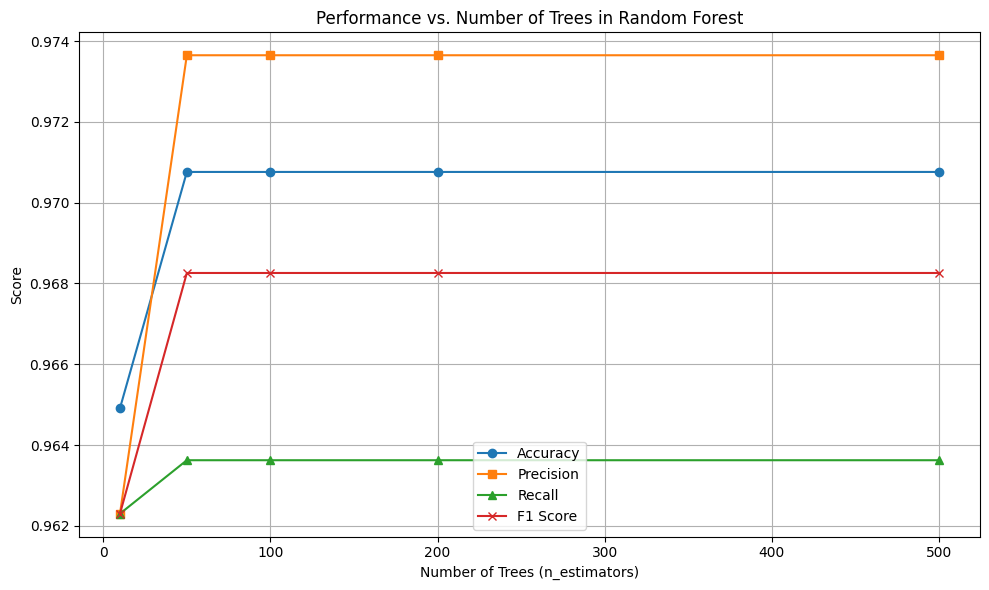

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# List of different number of trees to test
n_estimators_list = [10, 50, 100, 200, 500]

# Store evaluation metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Train and evaluate models
for n in n_estimators_list:
    clf = RandomForestClassifier(n_estimators=n, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy_list.append(accuracy_score(y_test, y_pred))
    precision_list.append(precision_score(y_test, y_pred, average='macro'))
    recall_list.append(recall_score(y_test, y_pred, average='macro'))
    f1_list.append(f1_score(y_test, y_pred, average='macro'))

# Plotting the metrics
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, accuracy_list, marker='o', label='Accuracy')
plt.plot(n_estimators_list, precision_list, marker='s', label='Precision')
plt.plot(n_estimators_list, recall_list, marker='^', label='Recall')
plt.plot(n_estimators_list, f1_list, marker='x', label='F1 Score')
plt.title('Performance vs. Number of Trees in Random Forest')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Exercise 4

Root Mean Squared Error (RMSE): 0.79
R-squared (R²) Score: 1.0


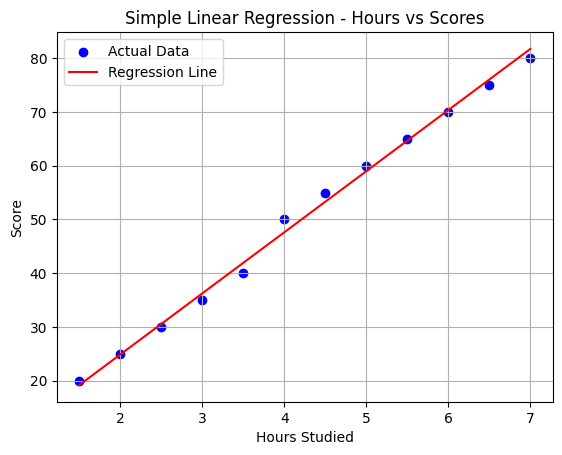

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Create dataset
data = {
    'Hours': [1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0],
    'Scores': [20, 25, 30, 35, 40, 50, 55, 60, 65, 70, 75, 80]
}
df = pd.DataFrame(data)

# Split into features and target
X = df[['Hours']]  # 2D array
y = df['Scores']   # 1D array

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R-squared (R²) Score:", round(r2, 2))

# Visualization
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.title('Simple Linear Regression - Hours vs Scores')
plt.legend()
plt.grid(True)
plt.show()


# Exercise 5

Confusion Matrix:
 [[1 0]
 [1 2]]
Accuracy: 0.75
Precision: 1.0
Recall: 0.67
Mean Squared Error: 0.25
Root Mean Squared Error: 0.5
New Test Predictions (58, 67, 77): [0, 1, 1]


C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


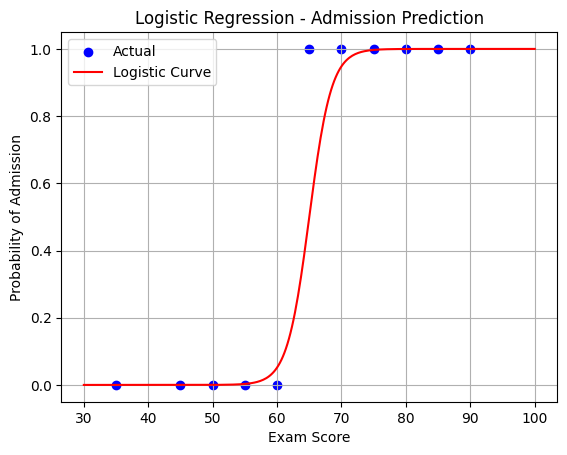

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, mean_squared_error

# Create dataset
data = {
    'Exam_Score': [35, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90],
    'Admitted':   [0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1]
}
df = pd.DataFrame(data)

# Features and label
X = df[['Exam_Score']]
y = df['Admitted']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# New test data
new_scores = pd.DataFrame({'Exam_Score': [58, 67, 77]})
new_predictions = model.predict(new_scores)

# Evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Output results
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", round(acc, 2))
print("Precision:", round(prec, 2))
print("Recall:", round(rec, 2))
print("Mean Squared Error:", round(mse, 2))
print("Root Mean Squared Error:", round(rmse, 2))
print("New Test Predictions (58, 67, 77):", new_predictions.tolist())

# Visualization
plt.scatter(X, y, color='blue', label='Actual')
x_vals = np.linspace(30, 100, 300).reshape(-1, 1)
plt.plot(x_vals, model.predict_proba(x_vals)[:, 1], color='red', label='Logistic Curve')
plt.xlabel('Exam Score')
plt.ylabel('Probability of Admission')
plt.title('Logistic Regression - Admission Prediction')
plt.legend()
plt.grid(True)
plt.show()

# Exercise 6

In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 1: Create dataset
data = {
    'Age': ['<=30', '<=30', '31-40', '>40', '>40', '>40', '31-40', '<=30', '<=30', '>40', '31-40'],
    'Salary': ['Low', 'Medium', 'Low', 'Low', 'High', 'Medium', 'High', 'Medium', 'High', 'Medium', 'Medium'],
    'Purchased': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes']
}
df = pd.DataFrame(data)

# Step 2: Preprocessing (label encoding)
le_age = LabelEncoder()
le_salary = LabelEncoder()
le_purchase = LabelEncoder()

df['Age'] = le_age.fit_transform(df['Age'])         # <=30: 0, 31-40: 1, >40: 2
df['Salary'] = le_salary.fit_transform(df['Salary'])# Low: 1, Medium: 2, High: 0
df['Purchased'] = le_purchase.fit_transform(df['Purchased']) # No: 0, Yes: 1

# Step 3: Split features and label
X = df[['Age', 'Salary']]
y = df['Purchased']

# Step 4: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Train Naive Bayes Classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Step 6: Predict on test data
y_pred = model.predict(X_test)

# Step 7: New Test Input
new_data = pd.DataFrame({
    'Age': le_age.transform(['<=30', '>40']),
    'Salary': le_salary.transform(['High', 'Low'])
})
new_prediction = model.predict(new_data)
predicted_labels = le_purchase.inverse_transform(new_prediction)

# Step 8: Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", round(accuracy, 2))
print("New Test Predictions:")
print("['<=30', 'High'] ->", predicted_labels[0])
print("['>40', 'Low'] ->", predicted_labels[1])

Confusion Matrix:
 [[0 2]
 [0 2]]
Accuracy: 0.5
New Test Predictions:
['<=30', 'High'] -> Yes
['>40', 'Low'] -> Yes


# Exercise 7

In [23]:
import numpy as np
import pandas as pd
from collections import Counter

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", 
           "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
data = pd.read_csv(url, header=None, names=columns)

# Check data
print(data.head())
print(data.describe())

# Step 3: Preprocessing
# Replace zeros in some columns which cannot be zero with NaN (like Glucose, BP, SkinThickness, Insulin, BMI)
cols_with_zero_invalid = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
data[cols_with_zero_invalid] = data[cols_with_zero_invalid].replace(0, np.nan)

# Fill NaN with median values (better than mean due to outliers)
for col in cols_with_zero_invalid:
    median = data[col].median()
    data[col].fillna(median, inplace=True)

# Step 4: Normalize the features (0-1 scaling)
features = data.columns[:-1]  # all except Outcome
data[features] = (data[features] - data[features].min()) / (data[features].max() - data[features].min())

# Split dataset into train and test (80-20 split)
from sklearn.model_selection import train_test_split
X = data[features].values
y = data["Outcome"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Implement KNN from scratch

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

def knn_predict(X_train, y_train, x_test, k=5, distance_metric='euclidean'):
    distances = []
    for i, x_train in enumerate(X_train):
        if distance_metric == 'euclidean':
            dist = euclidean_distance(x_train, x_test)
        elif distance_metric == 'manhattan':
            dist = manhattan_distance(x_train, x_test)
        else:
            raise ValueError("Unsupported distance metric")
        distances.append((dist, y_train[i]))
    distances.sort(key=lambda x: x[0])
    
    neighbors = distances[:k]
    # Majority vote
    labels = [label for _, label in neighbors]
    most_common = Counter(labels).most_common(1)
    return most_common[0][0]

# Step 6: Test accuracy on test data
def accuracy_score(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

# Try different k values and distance metrics
best_acc = 0
best_params = {}

for k in [3, 5, 7, 9]:
    for dist_metric in ['euclidean', 'manhattan']:
        y_pred = []
        for x_test in X_test:
            pred = knn_predict(X_train, y_train, x_test, k=k, distance_metric=dist_metric)
            y_pred.append(pred)
        acc = accuracy_score(y_test, np.array(y_pred))
        print(f"K={k}, Distance={dist_metric}, Accuracy={acc:.4f}")
        if acc > best_acc:
            best_acc = acc
            best_params = {'k': k, 'distance_metric': dist_metric}

print("\nBest Parameters:", best_params)
print(f"Best Accuracy: {best_acc:.4f}")

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

C:\Users\harsh\AppData\Local\Temp\ipykernel_17992\2456754669.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(median, inplace=True)
C:\Users\harsh\AppData\Local\Temp\ipykernel_17992\2456754669.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

K=3, Distance=euclidean, Accuracy=0.7208
K=3, Distance=manhattan, Accuracy=0.7208
K=5, Distance=euclidean, Accuracy=0.7468
K=5, Distance=manhattan, Accuracy=0.7338
K=7, Distance=euclidean, Accuracy=0.7468
K=7, Distance=manhattan, Accuracy=0.7532
K=9, Distance=euclidean, Accuracy=0.7597
K=9, Distance=manhattan, Accuracy=0.7468

Best Parameters: {'k': 9, 'distance_metric': 'euclidean'}
Best Accuracy: 0.7597
